Que tan reciente ha comprado. UlTIma compra
cuantas compras
cuanto ha gastado
todo por cliente

In [98]:
!pip install openpyxl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime

In [99]:
df = pd.read_excel('online_retail_II.xlsx')


In [100]:
df.shape

(525461, 8)

In [101]:
#df.head()
df.drop(['StockCode','Description','Country'],axis=1,inplace= True)
df.rename(columns={
            'Invoice' : 'order_id',
            'Quantity':'quantity',
            'InvoiceDate':'order_date',
            'Price' : 'unit_price',
            'Customer ID' : 'customer_id'},inplace= True)

In [117]:
df.head()

,order_id,quantity,order_date,unit_price,customer_id,line_price
0,489434,12,2009-12-01 07:45:00,6.95,13085.0,83.4
1,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.0
2,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.0
3,489434,48,2009-12-01 07:45:00,2.10,13085.0,100.8
4,489434,24,2009-12-01 07:45:00,1.25,13085.0,30.0


In [118]:
df.describe()

,quantity,order_date,unit_price,customer_id,line_price
count,513132.000000,513132,513132.000000,407695.000000,513132.000000
mean,11.715475,2010-06-28 21:19:25.102663424,4.239585,15368.504107,20.085018
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,0.000000
25%,1.000000,2010-03-21 15:03:00,1.250000,13997.000000,3.900000
50%,3.000000,2010-07-06 16:26:00,2.100000,15321.000000,10.120000
75%,10.000000,2010-10-15 14:51:00,4.210000,16812.000000,17.700000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,25111.090000
std,92.974904,NaN,63.567840,1679.795700,90.788035


In [119]:
df[  (df['quantity'] <0) &  (df['unit_price'] <  0) ]

,order_id,quantity,order_date,unit_price,customer_id,line_price


In [120]:
df[  (df['quantity'] <0) |  (df['unit_price'] <  0) ]

,order_id,quantity,order_date,unit_price,customer_id,line_price


In [121]:
df.drop(df[(df['quantity'] <0) |  (df['unit_price'] <  0) ].index,inplace = True ,axis = 0)

In [122]:
df.shape

(513132, 6)

In [123]:
df.isnull().sum()

order_id            0
quantity            0
order_date          0
unit_price          0
customer_id    105437
line_price          0
dtype: int64

In [124]:
df.isna().sum(axis=0)

order_id            0
quantity            0
order_date          0
unit_price          0
customer_id    105437
line_price          0
dtype: int64

In [125]:
df.dropna()

,order_id,quantity,order_date,unit_price,customer_id,line_price
0,489434,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...
525456,538171,2,2010-12-09 20:01:00,2.95,17530.0,5.90
525457,538171,1,2010-12-09 20:01:00,3.75,17530.0,3.75
525458,538171,1,2010-12-09 20:01:00,3.75,17530.0,3.75
525459,538171,2,2010-12-09 20:01:00,3.75,17530.0,7.50


In [126]:
df['line_price']= df['quantity']*df['unit_price']

INGENIERIA DE VARIABLES/COLUMNAS/CARACTERISTICAS/PREDICTORAS
TO CLUSTER
APLICANDO TECNICA RFM
    Recency = LOW/HIGH
    Frequency = 
    Monetary

Todo en un espeçifico perodio.



In [127]:
df

,order_id,quantity,order_date,unit_price,customer_id,line_price
0,489434,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...
525456,538171,2,2010-12-09 20:01:00,2.95,17530.0,5.90
525457,538171,1,2010-12-09 20:01:00,3.75,17530.0,3.75
525458,538171,1,2010-12-09 20:01:00,3.75,17530.0,3.75
525459,538171,2,2010-12-09 20:01:00,3.75,17530.0,7.50


In [130]:
#fecha máxima del perido 

ultima_fecha = max(df['order_date']) + dt.timedelta(days=1)
agrupo_clientes = df.groupby('customer_id')
metricas = {
    'quantity'           :  'count',
    'line_price'         :  'sum',
    'order_date'         : lambda x: (ultima_fecha - x.max()).days
   
}

resumen_clientes = agrupo_clientes.agg(metricas)
resumen_clientes.rename(columns={
                  'quantity':'frecuency',
                  'line_price':'monetary',
                   'order_date':'recency'},
                        inplace= True)



In [150]:
resumen_clientes.sort_index()

,frecuency,monetary,recency
customer_id,,,
12346.0,33,372.86,165
12347.0,71,1323.32,3
12348.0,20,222.16,74
12349.0,102,2671.14,43
12351.0,21,300.93,11
...,...,...,...
18283.0,230,641.77,18
18284.0,28,461.68,67
18285.0,12,427.00,296


In [132]:
resumen_clientes.isnull().sum()

frecuency    0
monetary     0
recency      0
dtype: int64

In [133]:
resumen_clientes.mean()

frecuency      94.505100
monetary     2047.288659
recency        91.269124
dtype: float64

In [134]:
resumen_clientes.describe()

,frecuency,monetary,recency
count,4314.000000,4314.000000,4314.000000
mean,94.505100,2047.288659,91.269124
std,202.020116,8912.523243,96.943482
min,1.000000,0.000000,1.000000
25%,18.000000,307.950000,18.000000
50%,44.000000,705.550000,53.000000
75%,102.000000,1722.802500,136.000000
max,5570.000000,349164.350000,374.000000


frecuency : 


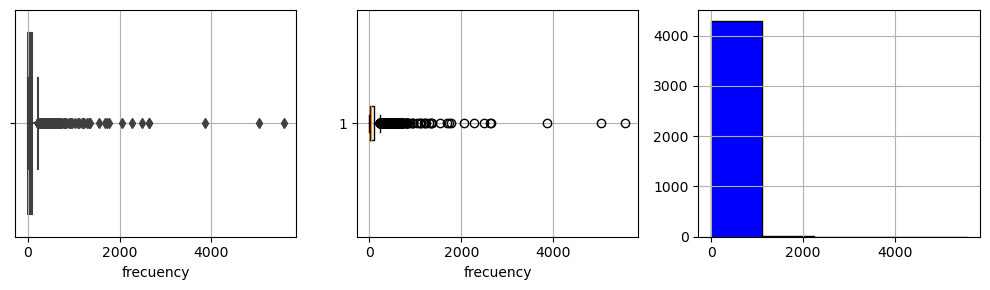

monetary : 


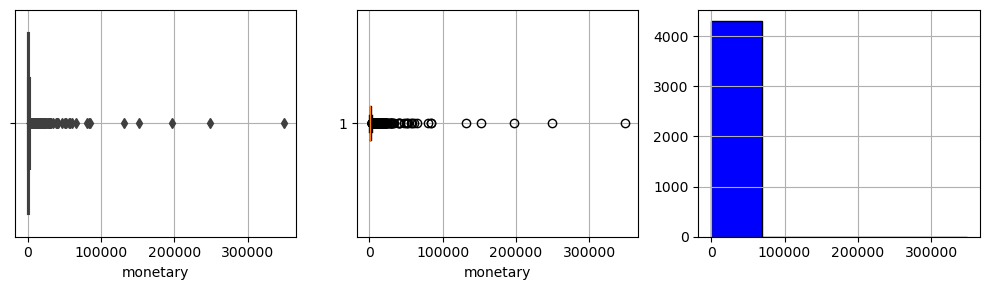

recency : 


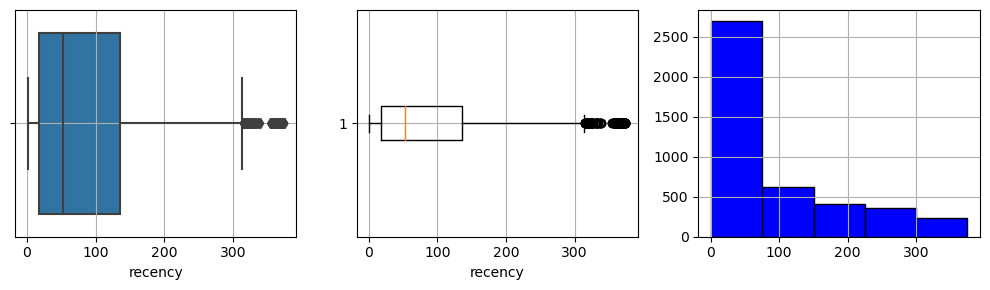

In [135]:
for i in resumen_clientes.columns:
    fig = plt.figure(figsize=(10, 3))
    plt.subplot(1,3,1)
    print(str(i) + ' : ')
    sns.boxplot(x = resumen_clientes[i])
    plt.grid(True)
    plt.subplot(1,3,2)
    plt.boxplot(resumen_clientes[i], vert=False)
    plt.xlabel(i)
    plt.grid(True)
    plt.subplot(1,3,3)
    plt.hist(resumen_clientes[i], bins=5, color='blue', edgecolor='black')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

frecuency : 


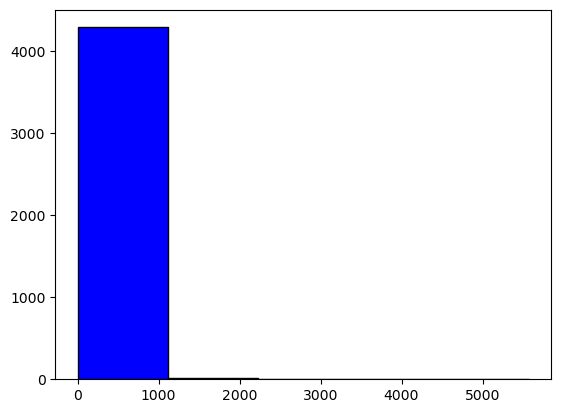

monetary : 


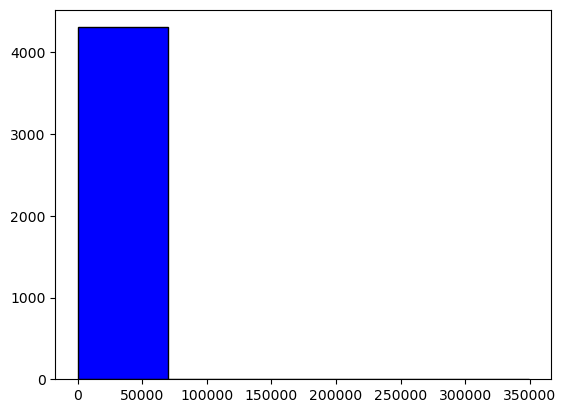

recency : 


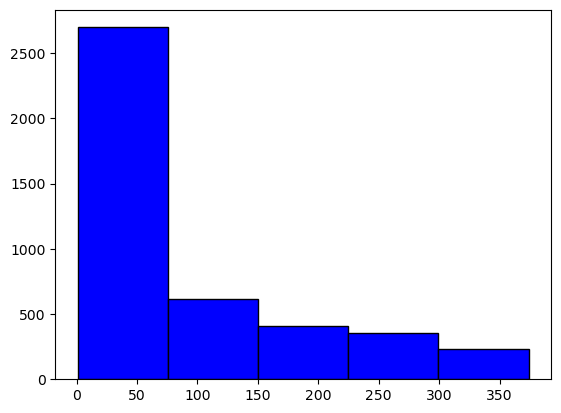

In [136]:
for i in resumen_clientes.columns:
    print(str(i) + ' : ')
    plt.hist(resumen_clientes[i], bins=5, color='blue', edgecolor='black')
    plt.show()

frecuency vs monetary: 
frecuency vs recency: 


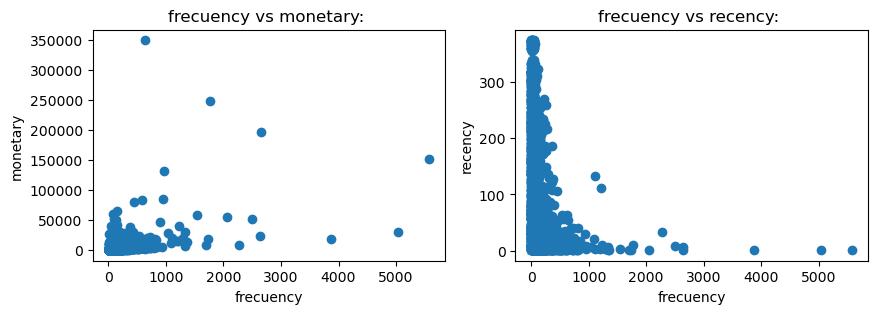

monetary vs frecuency: 
monetary vs recency: 


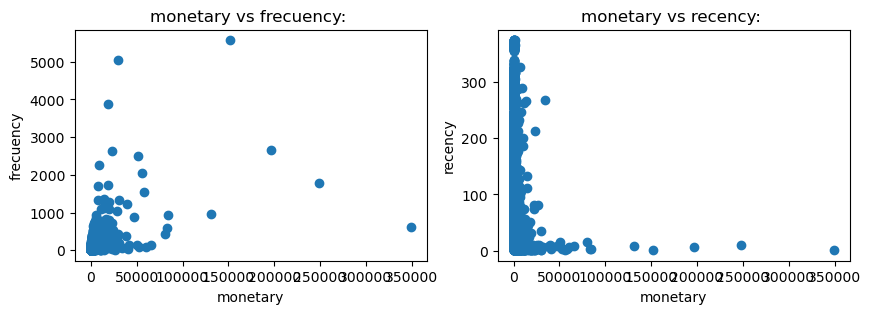

recency vs frecuency: 
recency vs monetary: 


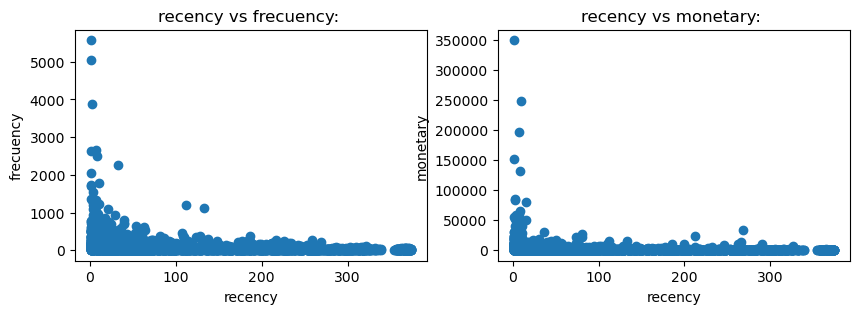

In [137]:
for i in resumen_clientes.columns:
    fig = plt.figure(figsize=(10, 3))
    posicion = 1
    for j in resumen_clientes.columns:
        if i != j:
          plt.subplot(1,2,posicion)
          print(str(i) + ' vs '+str(j) + ': ')
          plt.scatter(resumen_clientes[i], resumen_clientes[j])
          plt.title(str(i) + ' vs '+str(j) + ': ')
          plt.xlabel(i)
          plt.ylabel(j)
          posicion = posicion +1 
       
    plt.show()

D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


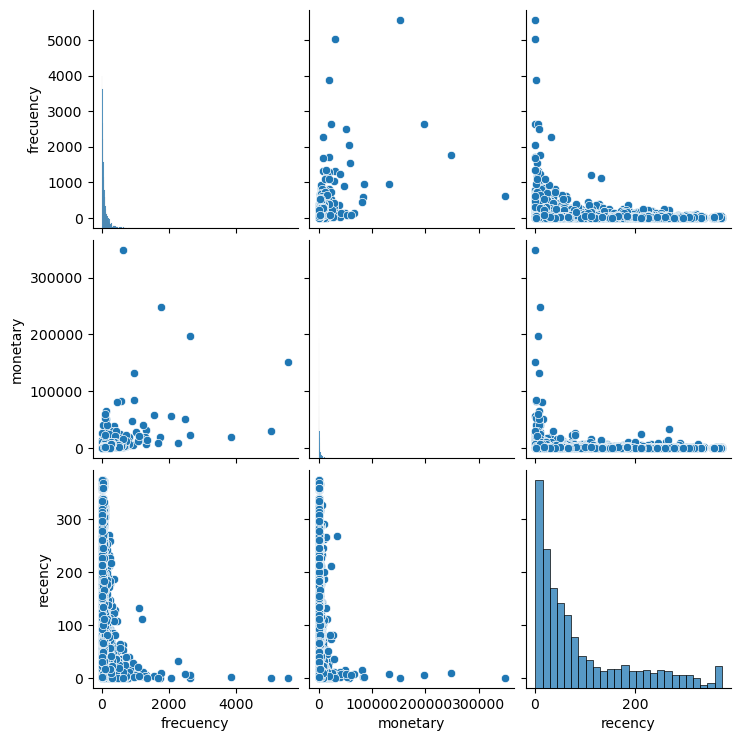

In [138]:
sns.pairplot(resumen_clientes)

<Axes: >

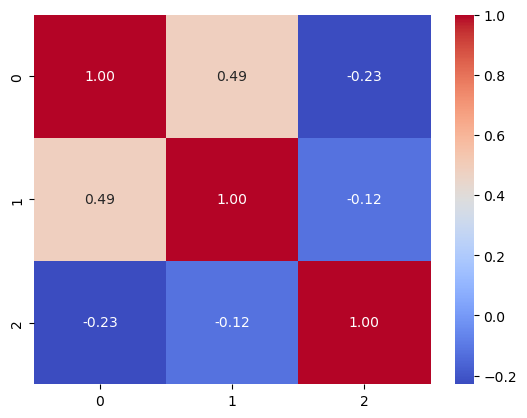

In [139]:
correlation_matrix = np.corrcoef(resumen_clientes, rowvar=False)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

#HEATMAP

<Axes: >

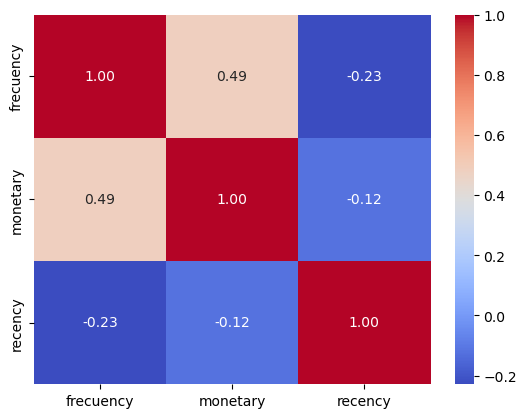

In [140]:
correlation_matrix2 = resumen_clientes.corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")

In [143]:
# Calcular logaritmo natural de cada valor + 1
resultado_log1p = np.log1p(resumen_clientes)
print(resultado_log1p)
scaler = StandardScaler()
scaler.fit(resultado_log1p)
resultado_normalizado = scaler.transform(resultado_log1p)
resultado_normalizado


             frecuency  monetary   recency
customer_id                               
12346.0       3.526361  5.923881  5.111988
12347.0       4.276666  7.188654  1.386294
12348.0       3.044522  5.407889  4.317488
12349.0       4.634729  7.890635  3.784190
12351.0       3.091042  5.710195  2.484907
...                ...       ...       ...
18283.0       5.442418  6.465787  2.944439
18284.0       3.367296  6.137036  4.219508
18285.0       2.564949  6.059123  5.693732
18286.0       4.219508  7.168141  4.727388
18287.0       4.454347  7.760770  2.944439

[4314 rows x 3 columns]


array([[-0.19943631, -0.53511151,  0.96536933],
       [ 0.39484037,  0.44738866, -1.90037048],
       [-0.58107433, -0.93594439,  0.35425374],
       ...,
       [-0.96091836, -0.43005306,  1.41283716],
       [ 0.34956827,  0.43145319,  0.6695416 ],
       [ 0.53557207,  0.89181885, -0.70187223]])

In [144]:
# Calcular logaritmo natural de cada valor + 1
#resultado_log1p = np.log1p(resumen_clientes)
#resultado_log1p
scaler = StandardScaler()
scaler.fit(resumen_clientes)
resultado_normalizado1 = scaler.transform(resumen_clientes)
resultado_normalizado1


array([[-0.30448567, -0.18789547,  0.76064344],
       [-0.11636378, -0.08123991, -0.91062704],
       [-0.36884315, -0.20480622, -0.17815665],
       ...,
       [-0.40844776, -0.18182017,  2.1121029 ],
       [-0.13616608, -0.08425736,  0.21386976],
       [-0.04705572,  0.03348725, -0.75587978]])

In [80]:

resultado_normalizado = pd.DataFrame(resultado_normalizado,columns=['frequency','monetary','recency'],index=resumen_clientes.index)

# Supongamos que resumen_clientes es otro DataFrame con los índices que deseas conservar
# Reindexar el DataFrame resultado_normalizado para que coincida con los índices de resumen_clientes
resultado_normalizado = resultado_normalizado.reindex(resumen_clientes.index)

resultado_normalizado.head()

,frequency,monetary,recency
customer_id,,,
12346.0,-0.199436,-0.535112,0.965369
12347.0,0.394840,0.447389,-1.900370
12348.0,-0.581074,-0.935944,0.354254
12349.0,0.678443,0.992701,-0.055950
12351.0,-0.544228,-0.701107,-1.055337


frequency : 


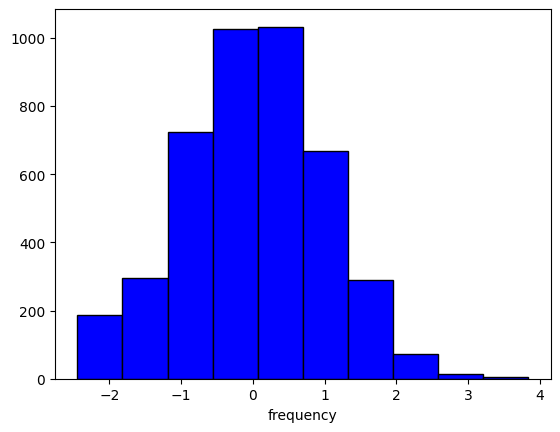

monetary : 


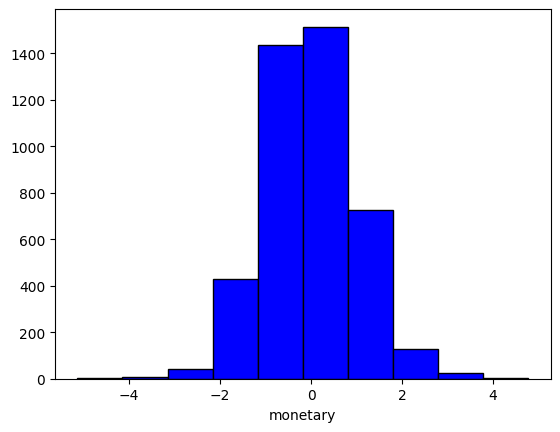

recency : 


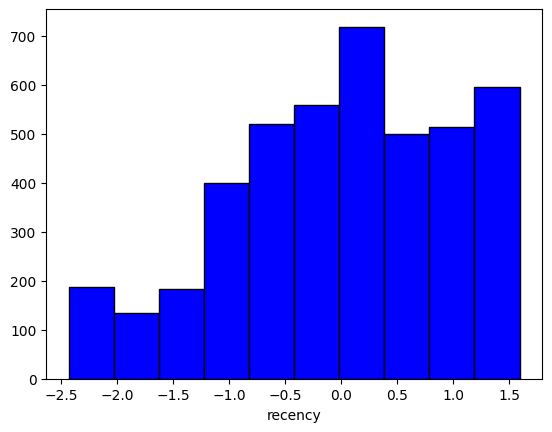

In [182]:
for i in resultado_normalizado.columns:
    print(str(i) + ' : ')
    plt.hist(resultado_normalizado[i], color='blue', edgecolor='black')
    plt.xlabel(i)
    plt.show()

frequency vs monetary: 


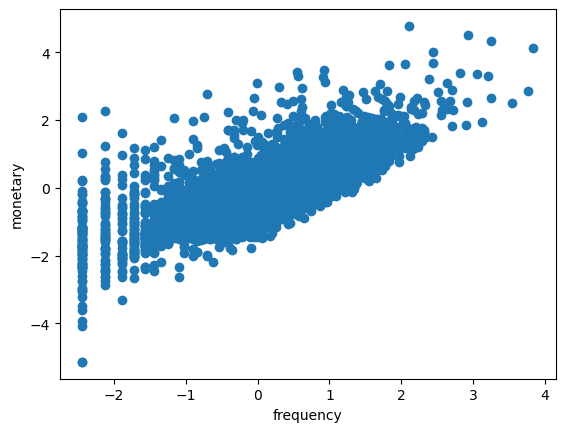

frequency vs recency: 


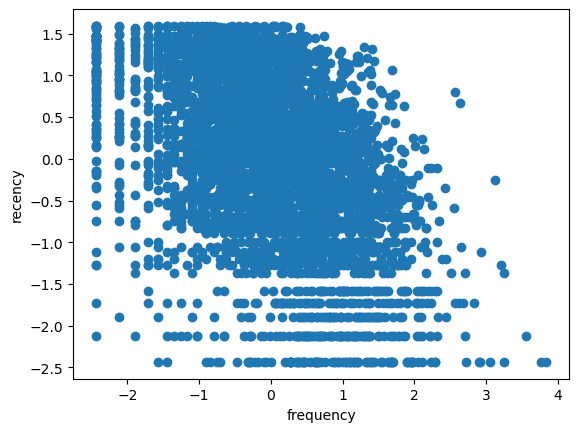

frequency vs cluster: 


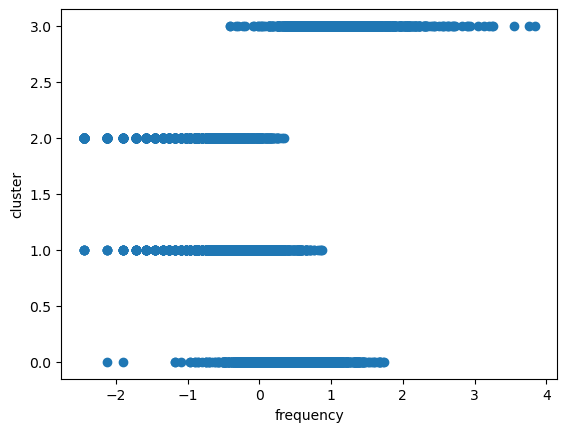

monetary vs frequency: 


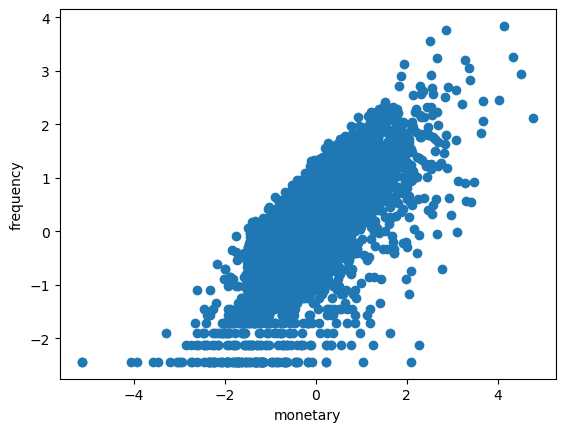

monetary vs recency: 


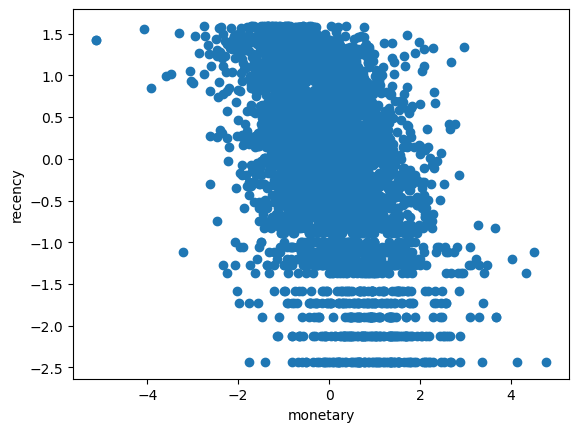

monetary vs cluster: 


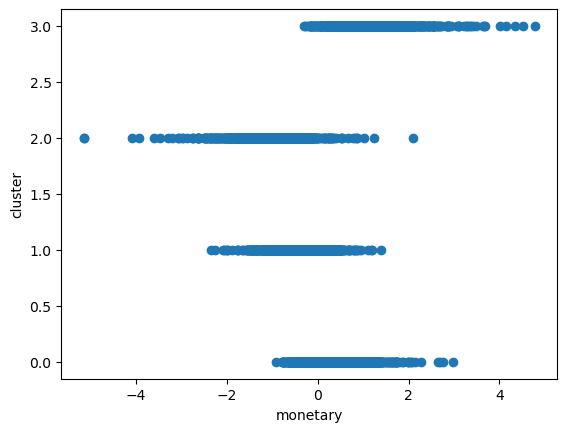

recency vs frequency: 


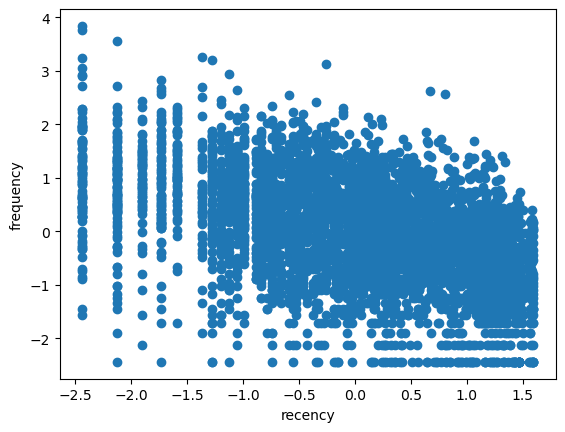

recency vs monetary: 


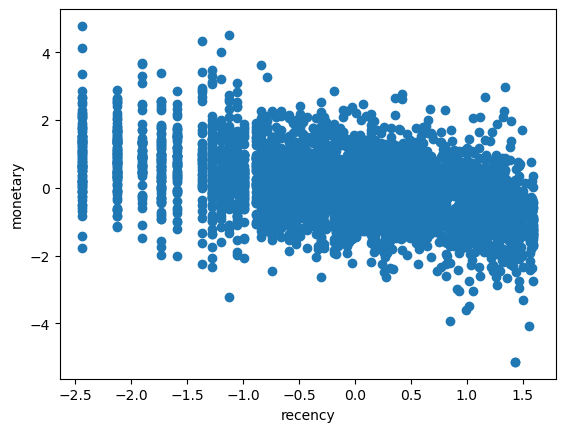

recency vs cluster: 


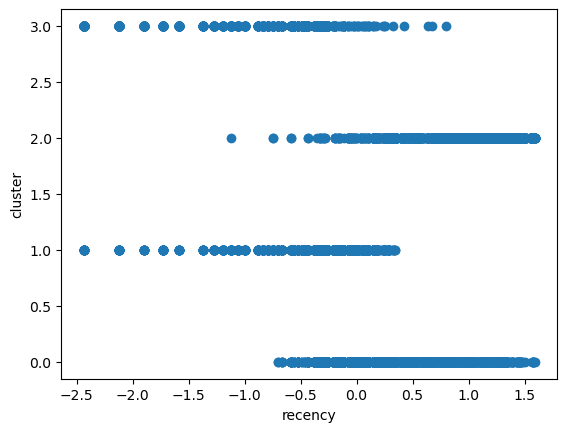

cluster vs frequency: 


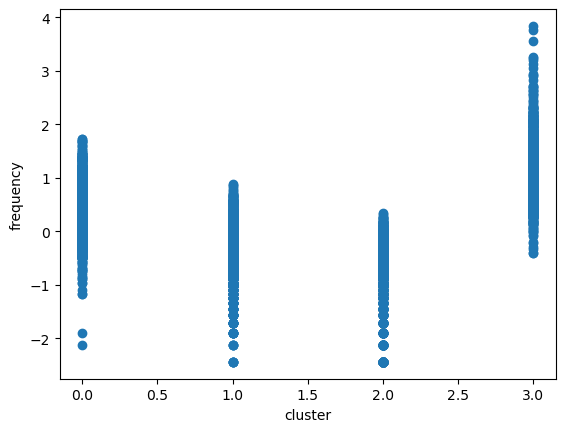

cluster vs monetary: 


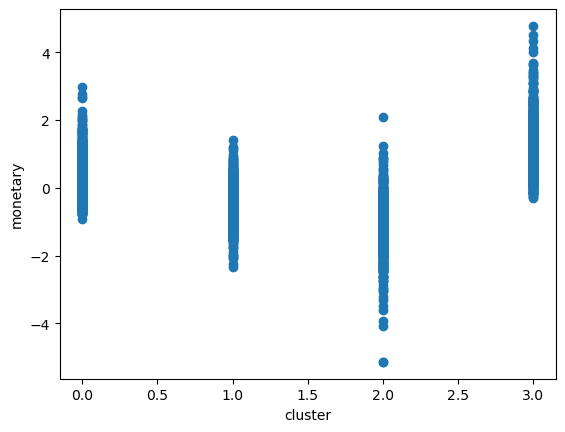

cluster vs recency: 


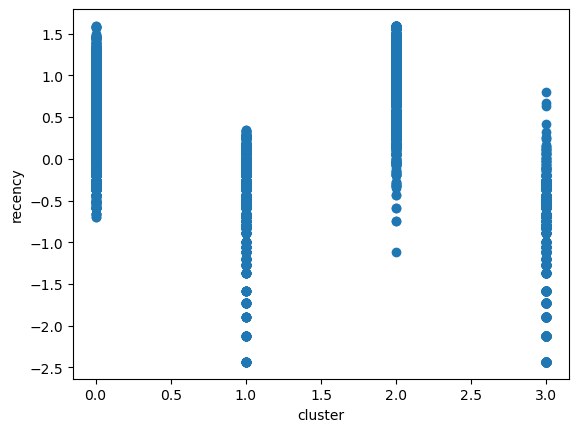

In [90]:
for i in resultado_normalizado.columns:
  for j in resultado_normalizado.columns:
    if i != j:
      print(str(i) + ' vs '+str(j) + ': ')
      plt.scatter(resultado_normalizado[i], resultado_normalizado[j])
      plt.xlabel(i)
      plt.ylabel(j)

      plt.show()




(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'frequency'),
  Text(0, 1.5, 'monetary'),
  Text(0, 2.5, 'recency')])

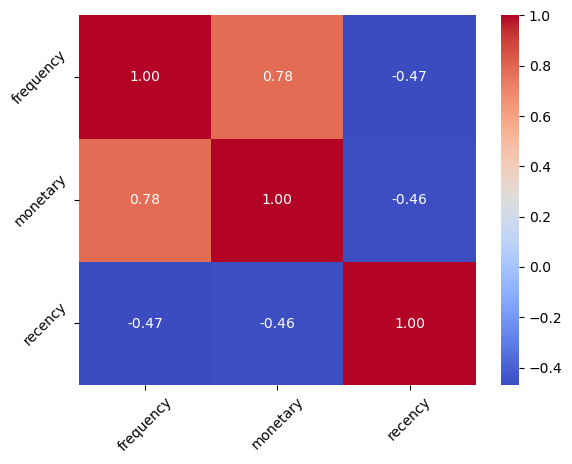

In [82]:
correlation_matrix = resultado_normalizado.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Establecer los nombres de las variables en los ejes
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [83]:
kmeans = KMeans(n_clusters=4,random_state=1, n_init='auto')

In [85]:
kmeans

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [86]:
kmeans.fit(resultado_normalizado)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [87]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([1261,  916, 1197,  940], dtype=int64))

In [88]:
resultado_normalizado['cluster'] = kmeans.labels_
resultado_normalizado

,frequency,monetary,recency,cluster
customer_id,,,,
12346.0,-0.199436,-0.535112,0.965369,2
12347.0,0.394840,0.447389,-1.900370,3
12348.0,-0.581074,-0.935944,0.354254,2
12349.0,0.678443,0.992701,-0.055950,0
12351.0,-0.544228,-0.701107,-1.055337,1
...,...,...,...,...
18283.0,1.318169,-0.114149,-0.701872,3
18284.0,-0.325423,-0.369529,0.278889,1
18285.0,-0.960918,-0.430053,1.412837,2


In [89]:
resultado_normalizado['cluster'] = resultado_normalizado['cluster'].astype('category')

frequency vs monetary: 


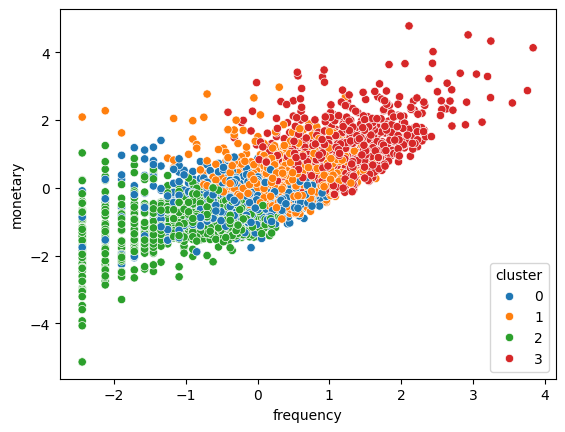

frequency vs recency: 


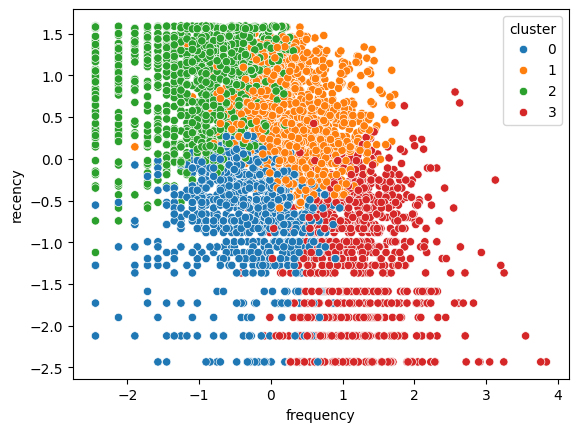

monetary vs frequency: 


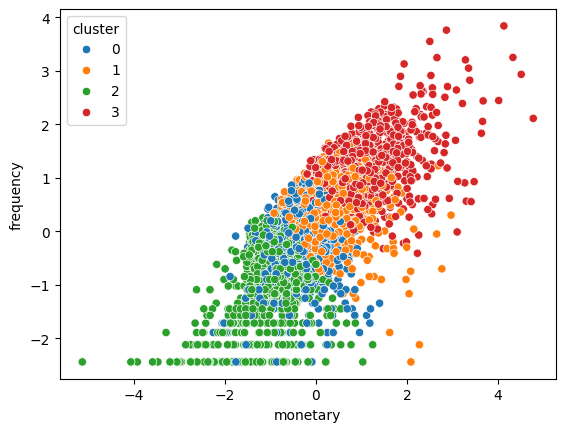

monetary vs recency: 


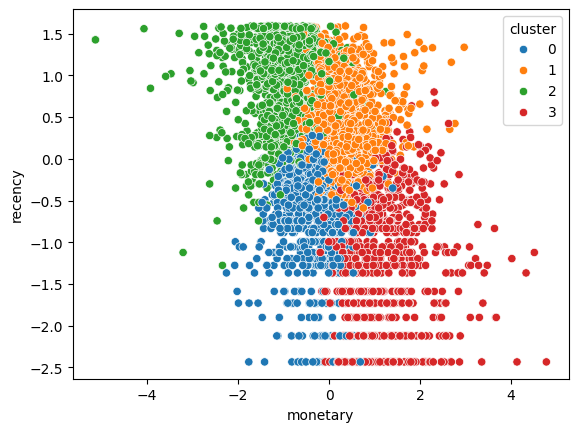

recency vs frequency: 


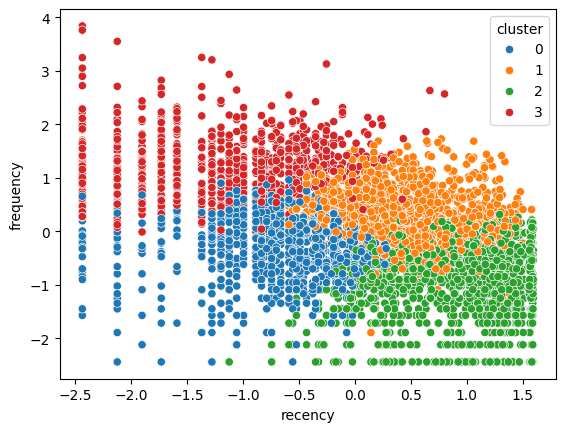

recency vs monetary: 


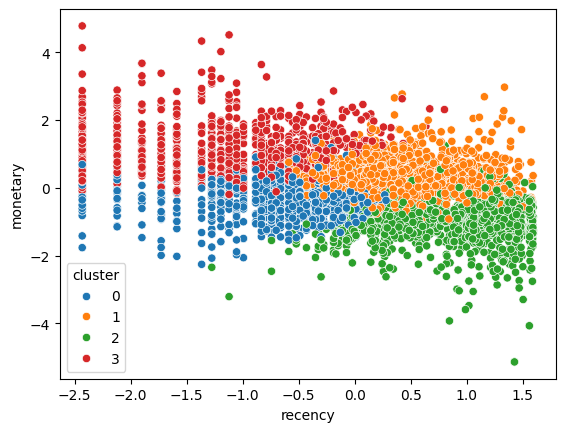

In [204]:
for i in resultado_normalizado.drop(columns='cluster'):

  for j in resultado_normalizado.drop(columns='cluster'):
    if i != j and ( (i != 'cluster') or (j != 'cluster')) :
      print(str(i) + ' vs '+str(j) + ': ')
      sns.scatterplot(data=resultado_normalizado, x=i, y=j, hue='cluster')

      plt.xlabel(i)
      plt.ylabel(j)

      plt.show()

In [91]:
resumen_clientes['cluster'] = kmeans.labels_
resumen_clientes['cluster'] = resultado_normalizado['cluster'].astype('category')

agrupo_cluster = resumen_clientes.groupby('cluster')

metricas = {
    'recency'          :  'mean' ,
    'frecuency'        :  'mean' ,
    'monetary'         :  'mean' ,
    'cluster'          :  'count'
}

resumen_cluster = agrupo_cluster.agg(metricas)
resumen_cluster.rename(columns={
                    'quantity':'frecuency',
                    'line_price':'monetary',
                    'order_date':'recency',
                     'cluster'  :'cluster_size'},
                     inplace= True)


C:\Users\victo\AppData\Local\Temp\ipykernel_11188\1042675899.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupo_cluster = resumen_clientes.groupby('cluster')


In [92]:
resumen_cluster.round(1).sort_values(by='recency')

,recency,frecuency,monetary,cluster_size
cluster,,,,
3,13.9,268.7,6372.4,940
1,25.8,32.8,544.5,916
0,99.2,84.6,1590.1,1261
2,193.7,15.4,282.4,1197


#PROBANDO TEXTO